# Naive Bayes

Naive Bayes é um algoritmo de aprendizado de máquina supervisionado que utiliza do Teorema de Bayes para realizar inferências com relação à ocorrência de uma variável categórica e dependente (y), com base nos valores estimados para as variáveis independentes. O algoritmo é chamado de "naive" (bobo) pois considera que todas as **variáveis aleatórias** envolvidas no modelo são independentes - i.e. $P(A \cap B) = P(A) \cdot P(B)$ - o que nem sempre ocorre na prática.

### Fórmula

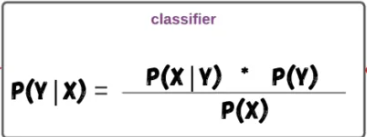

Todas as probabilidades do lado direito da equação são calculadas a partir de proporções amostrais, estimadas no conjunto de treinamento do modelo.

* $P(X=x_{i}|Y=y_{i})$ é a proporção de observações do tipo $x_{i}$ ocorridas em conjunto com $y_{i}$, em relação ao total de amostras do tipo $y_{i}$ contidas no conjunto de treinamento.

* $P(Y=y_{i})$ é a proporção de observações do tipo $y_{i}$ contidas no conjunto de treinamento, em relação ao total de amostras

### Previsões

Em posse das probabilidades de que cada $Y|_{i = 1}^n$ ocorra dado que $x_{i}$ ocorreu, concluimos que a previsão é dada pela classe Y que tem a **maior probabilidade** de ocorrência, ou seja, que maximiza $P(Y=y_{i}|X=x_{i})$.

**Obs.:** Note que o termo $P(X)$ é desconsiderado. Isso acontece pois, no cálculo das probabilidades $P(Y_{i}|X=x_{i})$, ele é constante para todos os termos, e para fins de simplificação, podemos excluí-lo sem perda de comparabilidade entre os resultados.

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

import pandas as pd

In [21]:
df = pd.read_csv("../dados/titanic.csv")
df = df[["SibSp", "Embarked", "Parch", "Sex", "Survived"]]
df.dropna(inplace = True)
df = df.astype(str)
df.head() # Alvo Binário: Survived

,SibSp,Embarked,Parch,Sex,Survived
0,1,S,0,male,0
1,1,C,0,female,1
2,0,S,0,female,1
3,1,S,0,female,1
4,0,S,0,male,0


In [22]:
encoder = LabelEncoder()
df["Embarked"] = encoder.fit_transform(df["Embarked"])
df["Sex"] = encoder.fit_transform(df["Sex"])

In [23]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ajuste do Modelo

In [24]:
modelo = CategoricalNB() 
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

### Métricas de Avaliação

In [25]:
# Acurácia
print(accuracy_score(y_test, y_pred))

0.8623853211009175


In [26]:
# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

[[190  18]
 [ 27  92]]


In [27]:
# Métricas de Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       208
           1       0.84      0.77      0.80       119

    accuracy                           0.86       327
   macro avg       0.86      0.84      0.85       327
weighted avg       0.86      0.86      0.86       327

